# Data Visualization - DART Tsunami Buoys


#### Description

The map is created with [PyGMT](https://www.pygmt.org/latest/) and provides a visual summary of the [DART](https://www.ndbc.noaa.gov/dart/dart.shtml "DART Network") (Deep-ocean Assessment and Reporting of Tsunamis) system network as of November 2021 (according to the [National Data Buoy Center](https://www.ndbc.noaa.gov/obs.shtml?lat=13&lon=-173&zoom=2&pgm=tsunami "NDBC")). The DART network includes United States systems as well as systems owned and operated by Australia, Chile, India, and Thailand.

#### [How does the DART technology work?](https://www.noaa.gov/jetstream/dart-max)

![Schematic of a DART system](https://legacy.itic.ioc-unesco.org/legacy.itic.ioc-unesco.org/images/stories/sea_level_monitors/DART/DART_system_components/Picture2-ArticleDART.png)


In [138]:
# Import packages
import pandas as pd
import pygmt
%matplotlib inline

In [139]:
stations = pd.read_csv("input/NDBC_Tsunami.txt", sep="\t")

**63** stations have been deployed as of November 2nd 2021.

In [140]:
stations.tail(5)

,Longitude,Latitude
59,-73.421,-20.474
60,-72.037,-23.163
61,-73.983,-26.743
62,-73.799,-32.123
63,-75.243,-35.758


In [141]:
# Load GMT Earth relief data in a xarray.DataArray
topo = pygmt.datasets.load_earth_relief("10m")

In [142]:
# Initialize figure
fig = pygmt.Figure()
fig.basemap(region="g", projection="N20c", frame=["a", "+tDART\bNetwork"])
fig.grdimage(topo, cmap="geo")
fig.colorbar(position="JCR+v", frame=["x2000", "y+lm"])

grdimage [WARNING]: Mixing old CPT master tables with HINGE = <value> in D:/GMT5/share/cpt/geo.cpt.  Interpreted as HARD_HINGE.


In [143]:
fig.plot(x=stations.Longitude, y=stations.Latitude, style="d0.5c", color="red", pen="black", label="Tsunami\bStations")
#-Sksymbolname

In [144]:
# Add the GMT logo in the Bottom Right corner of the current map, scaled up to be 2 cm wide
fig.logo(position="jBR+w2c")

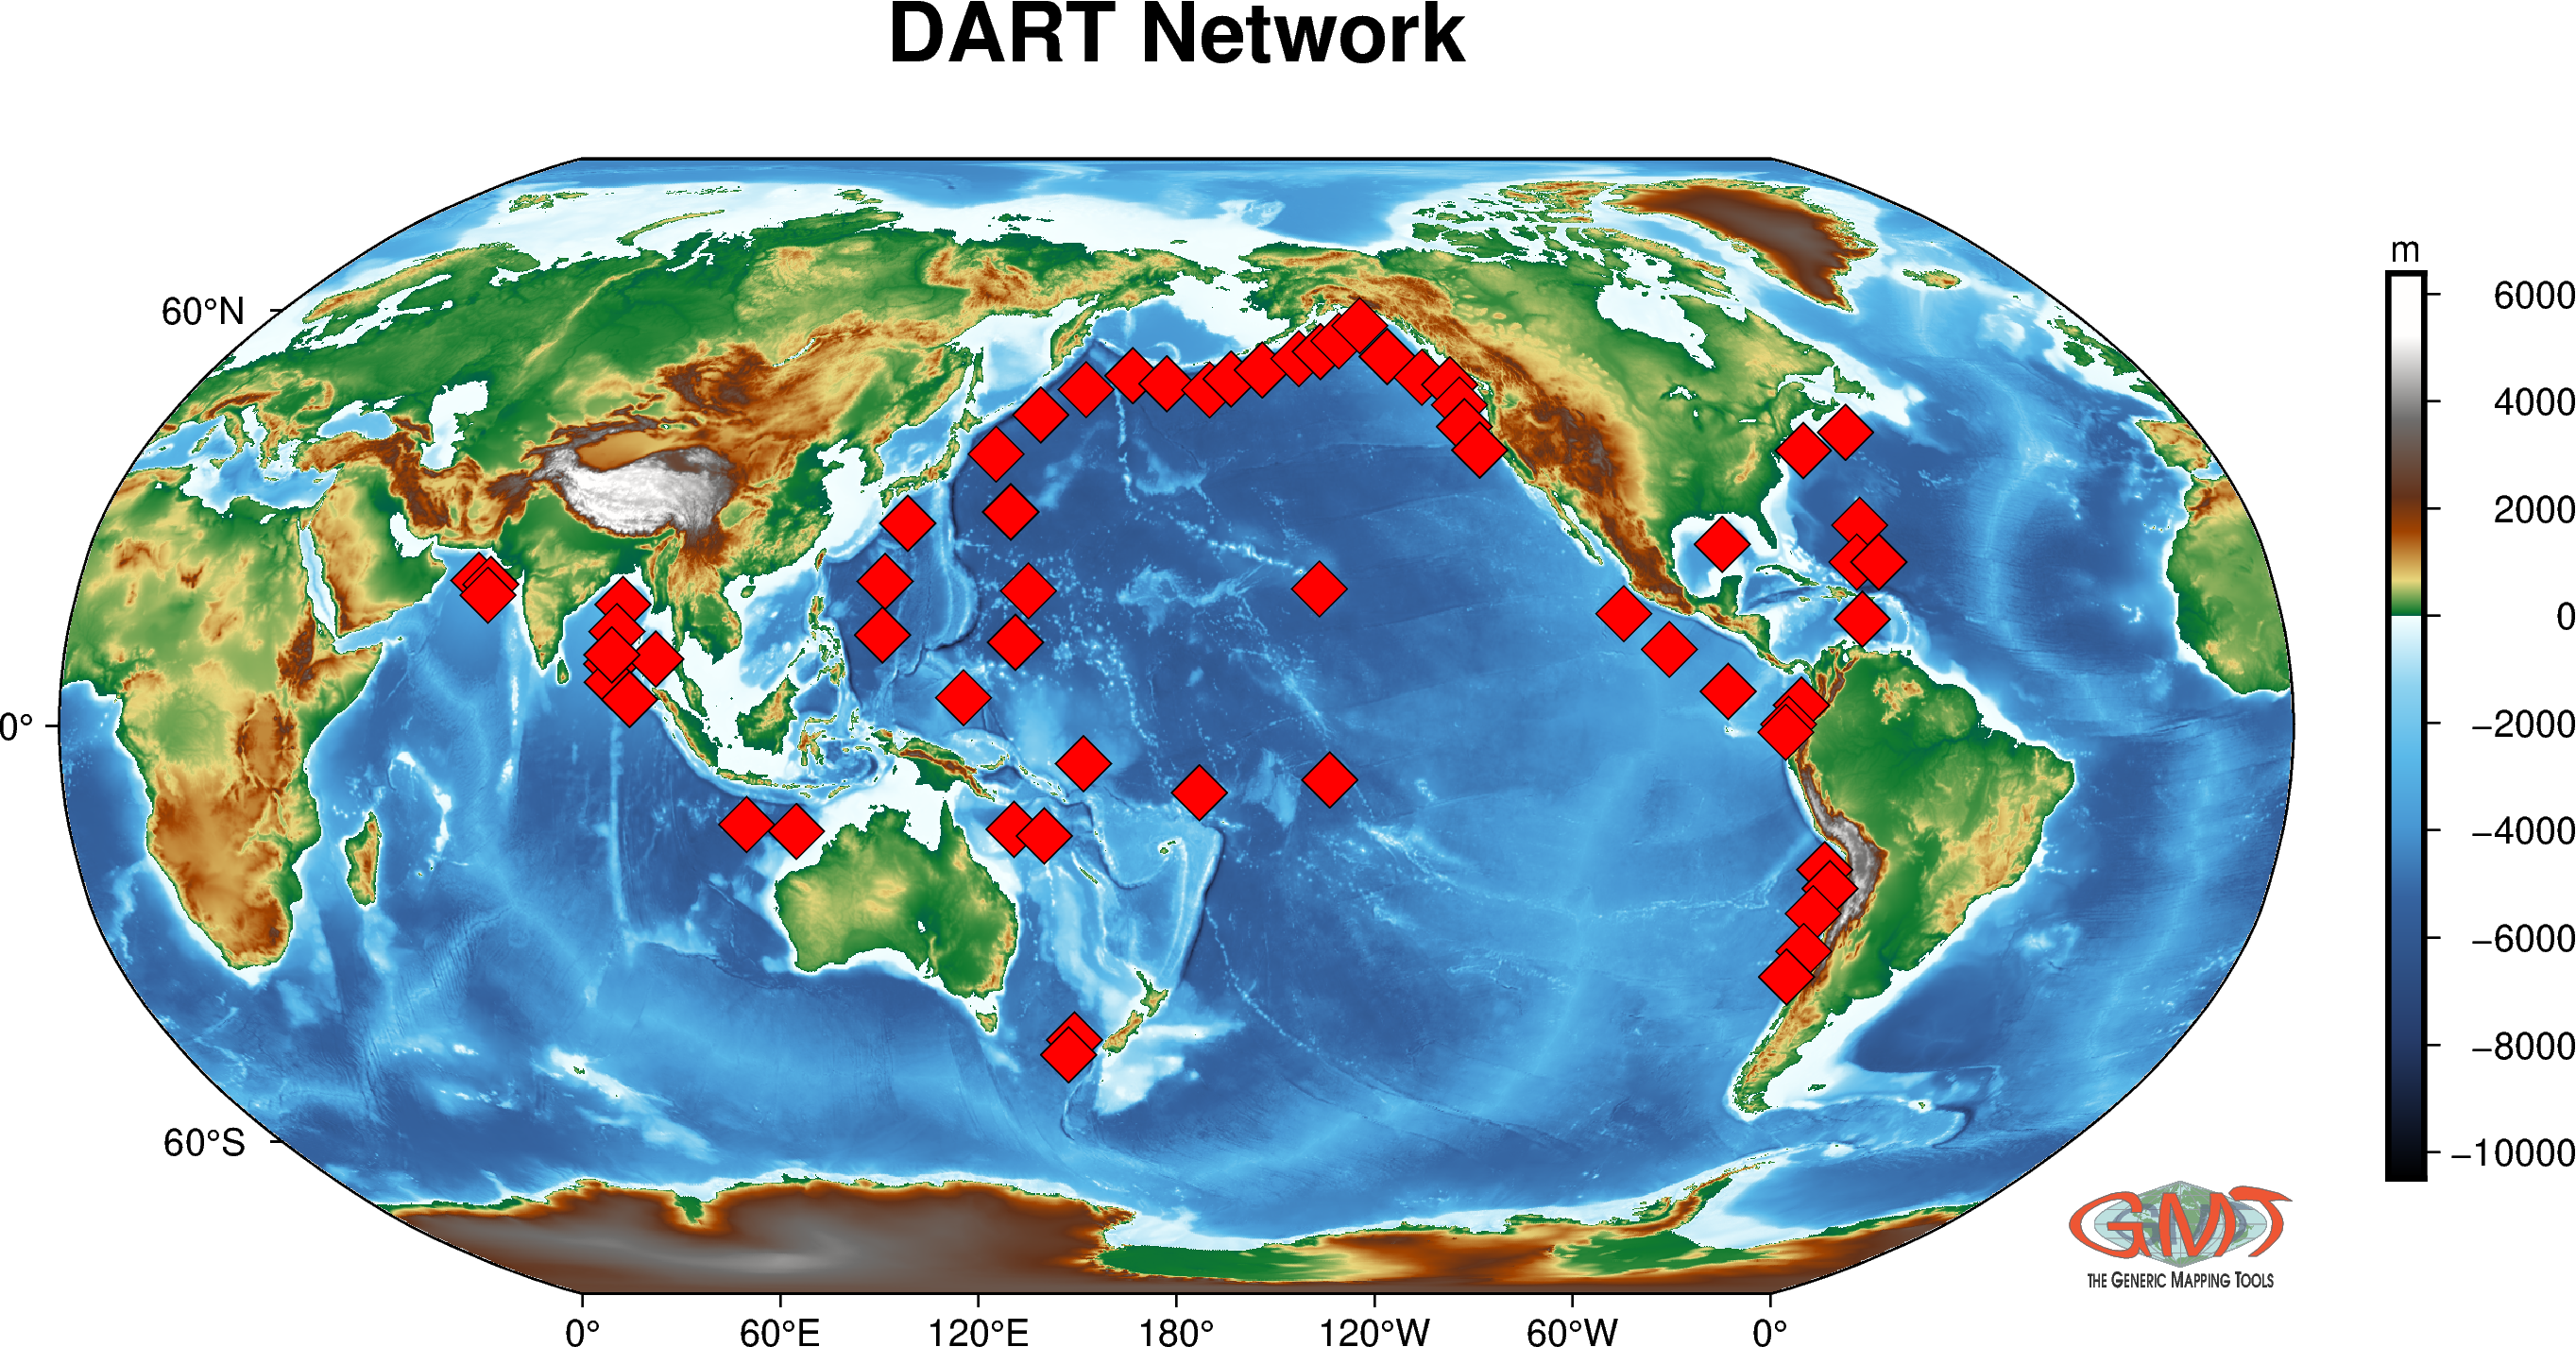

In [145]:
# Show map
fig.show()

In [146]:
# Save map
fig.savefig("output/DARTstations.png", dpi=300)